In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from Frame import *


10


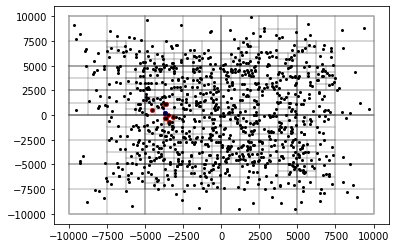

In [5]:
# teste
size = 10000
d = 100
taxis = []
for i in range(10):
    taxis+=[Taxi(i, random.uniform(-size/(2**(i/d)), size/(2**(i/d))), random.uniform(-size/(2**(i/d)), size/(2**(i/d))), random.choices([0,1])[0], random.choices([1,2,3,4])[0]) for i in range(100)]

f = Frame(taxis=taxis)
id = len(taxis)-1
tt = f.scan_100(taxis[id].coord[0], taxis[id].coord[1])
for t in tt:
    t.plot(color='red', markersize=4)
taxis[id].plot(color='blue', markersize=4)

print(len(tt))
plt.rcParams['figure.figsize'] = (11, 11)
f.plot()
# print(f)